Implementation of clusterization using DBScan to find concentration of popular restaurants

In [58]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def find_clusters(filtered_data):
    lat_long_data = filtered_data[['latitude', 'longitude']]

    dbscan = DBSCAN(eps=0.02, min_samples=50)

    dbscan.fit(lat_long_data)

    labels = dbscan.labels_
    centroids = dbscan.components_

    print(labels)

    plt.scatter(lat_long_data['longitude'], lat_long_data['latitude'], c=labels, cmap='viridis')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('DBSCAN Clusters')

    
    
    plt.show()
    return dbscan.components_



Primeiro vamos plotar o DB scan para os restaurantes com destaque. Eu selecionei um EPS baixo e um min_samples alto para que o algoritmo não separe os restaurantes em clusters pequenos mas retorne um hotspot ideal. Parece ser no Sul da cidade, que o maps revela como sendo o centro metropolitano, com ênfase em restaurantes perto do lago Ontario ao sul

[ 0  0  0 ...  0  0 -1]


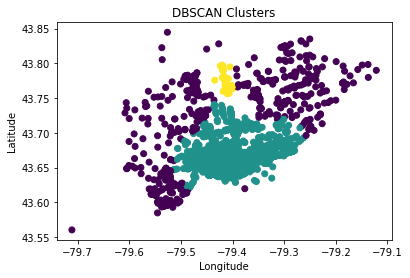

array([[ 43.6540016 , -79.4521893 ],
       [ 43.6460187 , -79.4088138 ],
       [ 43.672546  , -79.2880978 ],
       ...,
       [ 43.6543466 , -79.4009509 ],
       [ 43.6821078 , -79.3293678 ],
       [ 43.6885701 , -79.39201644]])

In [60]:


data = pd.read_csv('./kaggle/input/desafioutfpr2024/X_trainToronto.csv')
filtered_data = data[data['destaque'] == 1]
find_clusters(filtered_data)


Ao plotar os lugares sem destaque vemos uma distribuição mais uniforme, com destaque para a região central da cidade. Ainda assim engloba o centro urbano e o lago Ontario, mas com uma distribuição mais uniforme. Criou-se dois outros clusters no lado Oeste

[0 0 0 ... 0 0 0]


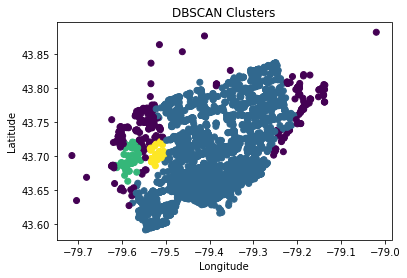

In [61]:
filtered_data_impop = data[data['destaque'] == 0]
find_clusters(filtered_data_impop);

Conclue-se que os lugares mais populares tem intersecção grande com a densidade populacional e a proximidade com o lago Ontario e o aeroporto da cidade.